In [1]:
%reset

Nothing done.


In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
import os
from pathlib import Path
from ct_dataset import CTDataset

number_of_ct_patients = 10
# number_fine_tuned_patients = 4
job_dir = os.getcwd()
data_path = "datasets/"

path_to_dataset = f"{job_dir}/{data_path}/liver_dataset_{number_of_ct_patients}.npz"

In [4]:
# Steps:
# Load dataset
# Split Train / Test
# select number_fine_tuned_patients randomly from Train
# Set X_Train, Y_Train, X_Test, Y_Test



In [16]:
from ct_dataset import CTDataset

dataset = CTDataset(path_to_dataset)
# dataset.split_train_test(number_of_ct_patients)
dataset.split_finetune(number_of_ct_patients)
# dataset_train.mask_and_save()
# dataset.print_summary()
# dataset_train.print_XY_samples()

# X_train = dataset_train.X_train_masked
# Y_train = dataset_train.X_train
# X_val = dataset_train.X_val_masked
# Y_val = dataset_train.X_val
# X_test = dataset_train.X_test_masked
# Y_test = dataset_train.X_test


# X_train = dataset_train.X_train_masked
# Y_train = dataset_train.X_train
# X_val = dataset_train.X_val_masked
# Y_val = dataset_train.X_val
# X_test = dataset_train.X_test_masked
# Y_test = dataset_train.X_test

train idx:  [] Length:  0 <class 'list'>
test idx:  [1] Length:  1 <class 'list'>
val idx:  [8] Length:  1 <class 'list'>


ValueError: need at least one array to concatenate

In [17]:
from sklearn.model_selection import train_test_split
import random


train_idx, test_idx = train_test_split(range(number_of_ct_patients), test_size=0.2, random_state=42)
train_idx = test_idx

# train_idx = [55, 40, 19, 31, 115, 56, 69, 105, 81, 26, 95, 27, 64, 4, 97, 100, 36, 80, 93, 84, 18, 10, 122, 11,
#              127, 45, 70]
# Shuffle the list to ensure randomness
random.shuffle(train_idx)
# Calculate the split index
split_index = int(len(train_idx) * 0.8)
# Split the list into two parts
test_idx = train_idx[split_index:]  # 20% of the data
train_idx = train_idx[:split_index]  # 80% of the data

random.shuffle(train_idx)
split_index = int(len(train_idx) * 0.8)
val_idx = train_idx[split_index:]
train_idx = train_idx[:split_index]  # 80% of the data

# print("number_fine_tuned_patients: ", number_fine_tuned_patients)
print("train idx: ", train_idx, "Length: ", len(train_idx), type(train_idx))
print("test idx: ", test_idx, "Length: ", len(test_idx), type(test_idx))
print("val idx: ", val_idx, "Length: ", len(val_idx), type(val_idx))
# Combine slices from selected patients
X_train = np.concatenate([images[i] for i in train_idx])

train idx:  [] Length:  0 <class 'list'>
test idx:  [8] Length:  1 <class 'list'>
val idx:  [1] Length:  1 <class 'list'>


train idx:  [5, 6, 7, 9, 2, 3] Length:  6
test idx:  [8, 1] Length:  2
val idx:  [0, 4] Length:  2
Splits by patients:
6 2 2
Train Shape:  (1020, 256, 256, 1) Validation Shape:  (279, 256, 256, 1) Test Shape:  (208, 256, 256, 1)
Train Processed 0/1020
Train Processed 500/1020
Train Processed 1000/1020
Completed Train Processed 1020/1020
Val Processed 0/279
Completed Val Processed 279/279
Test Processed 0/208
Completed Test Processed 208/208
###### Summary of the dataset
Number of patients:  10
Train X shape: (1020, 256, 256, 1) Train Masked: (1020, 256, 256)
Train Y shape: (1020, 256, 256, 1)
Val X shape: (279, 256, 256, 1) Val X Masked: (279, 256, 256)
Val Y shape: (279, 256, 256, 1)
Test X shape: (208, 256, 256, 1) Test X Masked: (208, 256, 256)
Test Y shape: (208, 256, 256, 1)
###### End Summary ##########


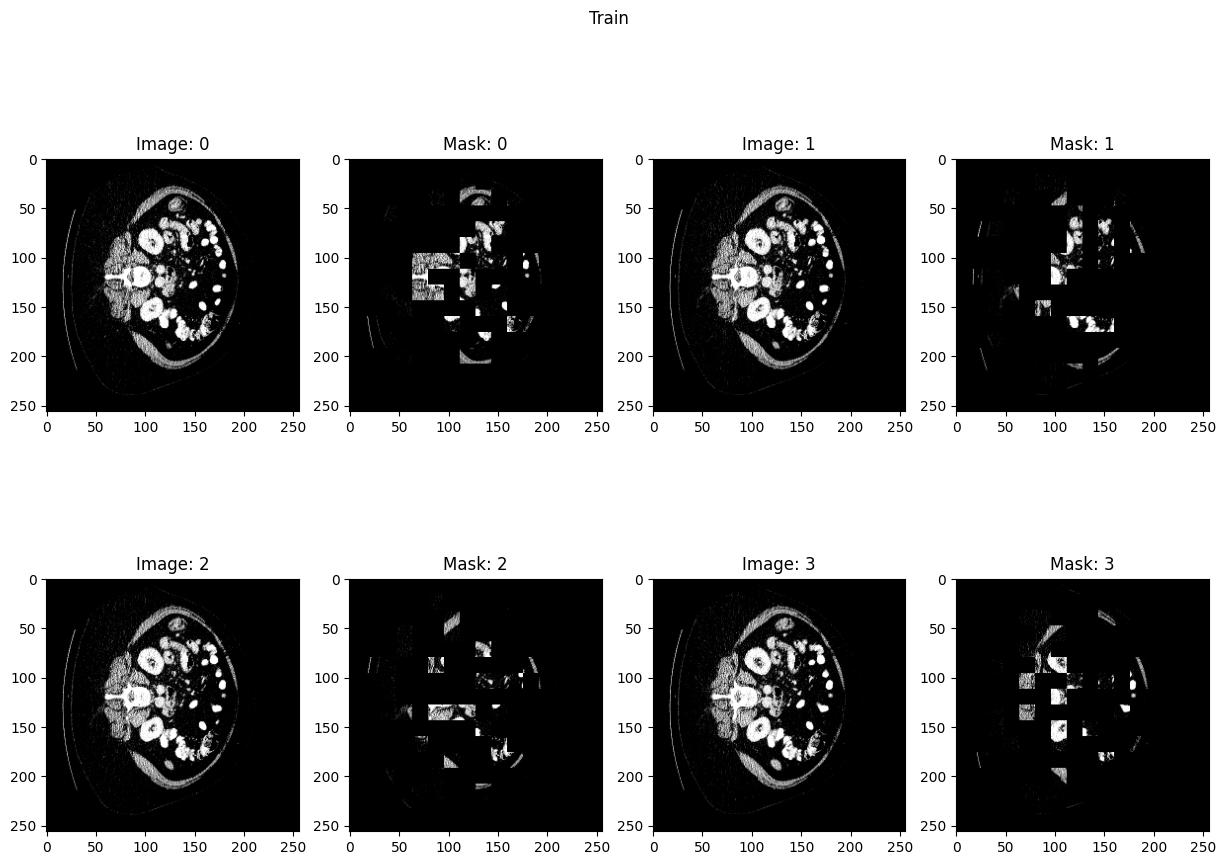

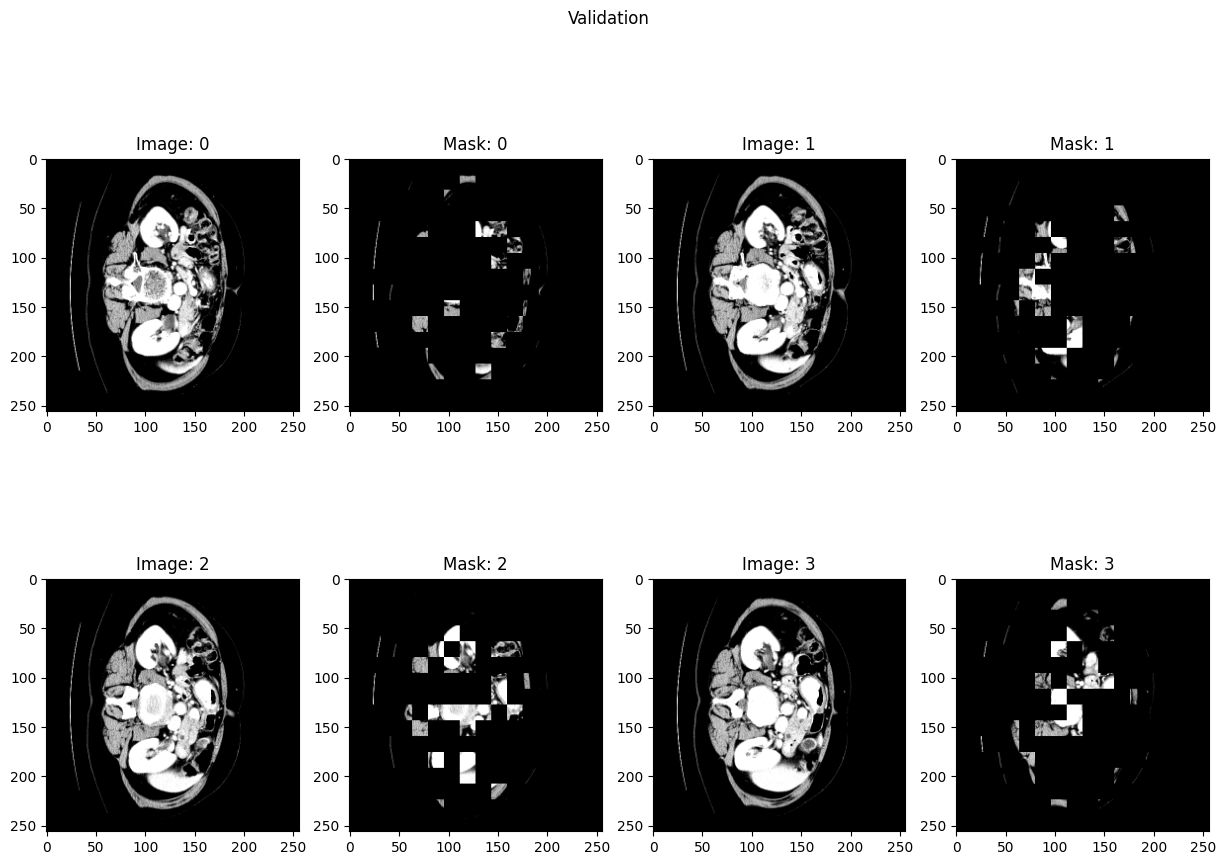

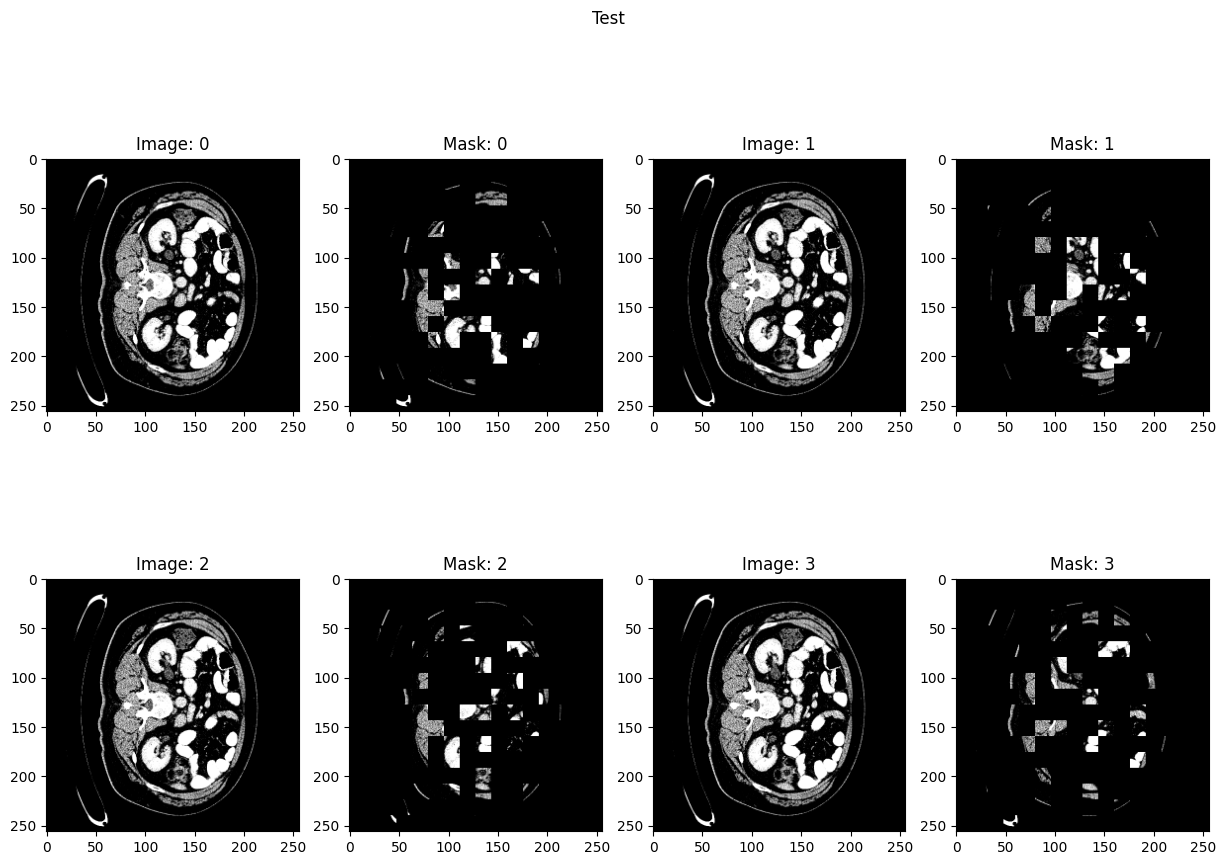

In [8]:
dataset_train = CTDataset(path_to_dataset)
dataset_train.split_train_test(number_of_ct_patients)
dataset_train.mask_and_save()
dataset_train.print_summary()
dataset_train.print_XY_samples()